# EDA on Global Financial Giants 2024

The purpose of this notebook is to look at and analyze the global financial giants by revenue in 2024.
As a first step we load the necessary libraries and the dataset. 

In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('financial_giants.csv')

Now we take a first look at the dataset itself.

In [79]:
df.head(5)

,Rank,Company,Industry,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions),Headquarters
0,1,Transamerica Corporation,Conglomerate,245510,42521,873,United States
1,2,Ping An Insurance Group,Insurance,191509,20738,1460,China
2,3,ICBC,Banking,182794,45783,5110,China
3,4,China Construction Bank,Banking,172000,39282,4311,China
4,5,Agricultural Bank of China,Banking,153884,31293,4169,China


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Rank                            50 non-null     int64 
 1   Company                         50 non-null     object
 2   Industry                        50 non-null     object
 3   Revenue in (USD Million)        50 non-null     int64 
 4   Net Income in (USD Millions)    50 non-null     int64 
 5   Total Assest in (USD Millions)  50 non-null     int64 
 6   Headquarters                    50 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.9+ KB


In [81]:
df.isnull().sum()

Rank                              0
Company                           0
Industry                          0
Revenue in (USD Million)          0
Net Income in (USD Millions)      0
Total Assest in (USD Millions)    0
Headquarters                      0
dtype: int64

In [82]:
df.describe()

,Rank,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions)
count,50.00000,50.000000,50.000000,50.00000
mean,25.50000,85435.120000,9369.320000,1480.46000
std,14.57738,44689.154251,11101.187832,1282.83769
min,1.00000,14592.000000,169.000000,13.00000
25%,13.25000,56189.250000,3030.250000,588.00000
50%,25.50000,70736.000000,4963.000000,1024.50000
75%,37.75000,96284.250000,10660.750000,2183.75000
max,50.00000,245510.000000,45783.000000,5110.00000


And now we do some analysis of the data in pretty graphs 

In [83]:
df_by_country = df.groupby('Headquarters', as_index=False).agg({'Revenue in (USD Million)': 'sum'})

In [84]:
fig = px.scatter_geo(df_by_country, locations='Headquarters',locationmode="country names",scope="world",color="Revenue in (USD Million)",size="Revenue in (USD Million)",size_max=25,title="Revenue in USD around the globe",template='seaborn',color_continuous_scale="viridis")
fig.show()

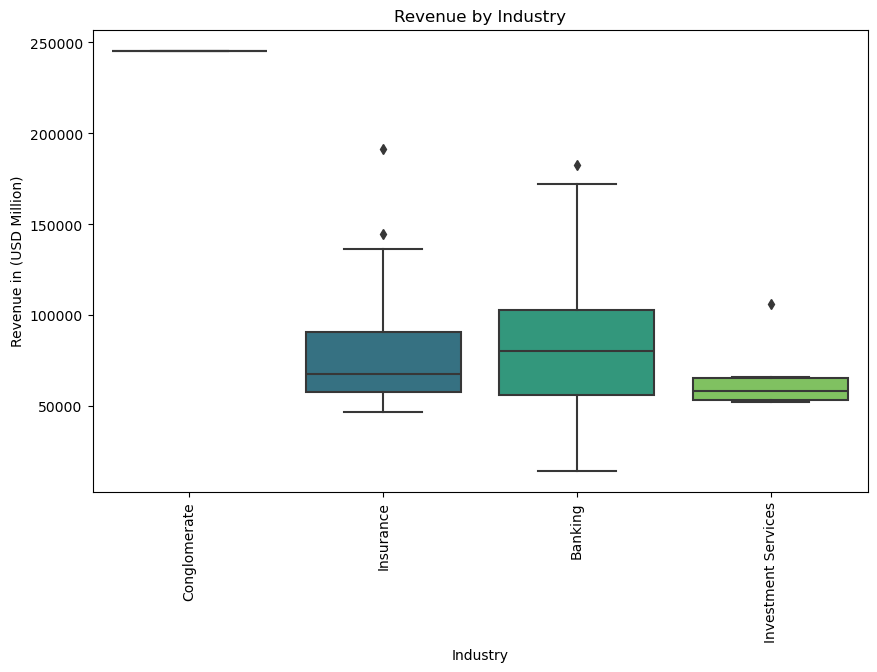

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Revenue in (USD Million)', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Revenue by Industry')
plt.show()

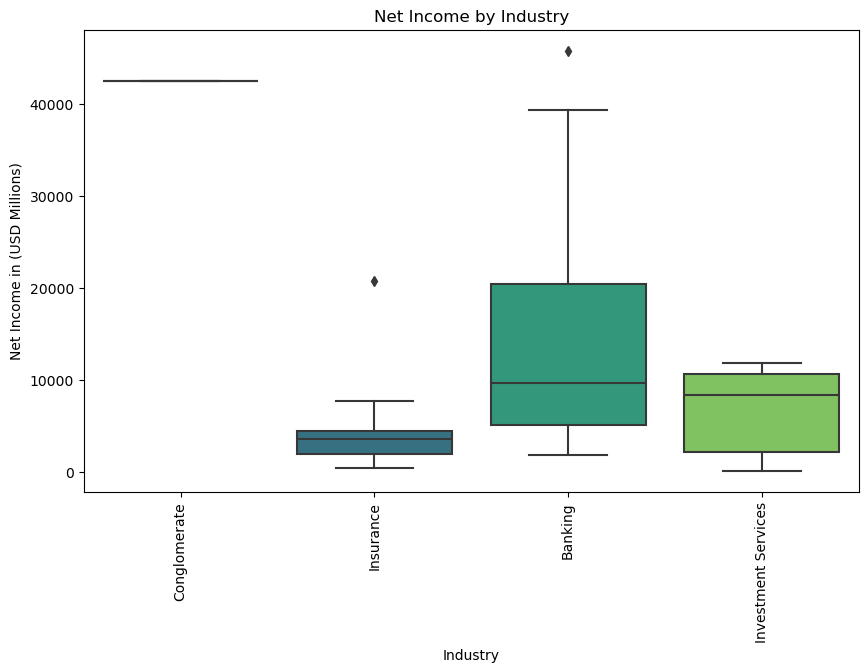

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Net Income in (USD Millions)', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Net Income by Industry')
plt.show()

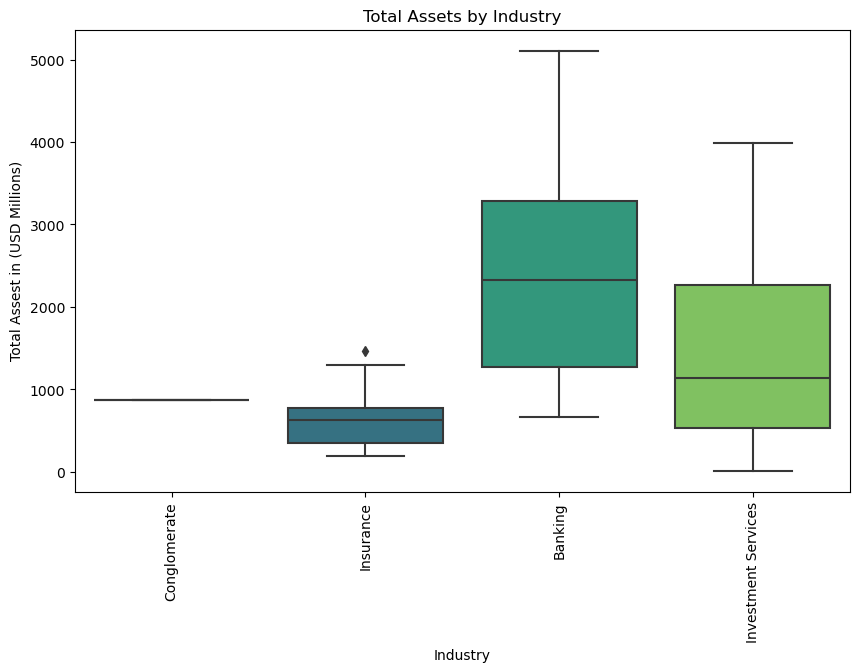

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Total Assest in (USD Millions)', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Assets by Industry')
plt.show()

Plotting the top companies in different categories 

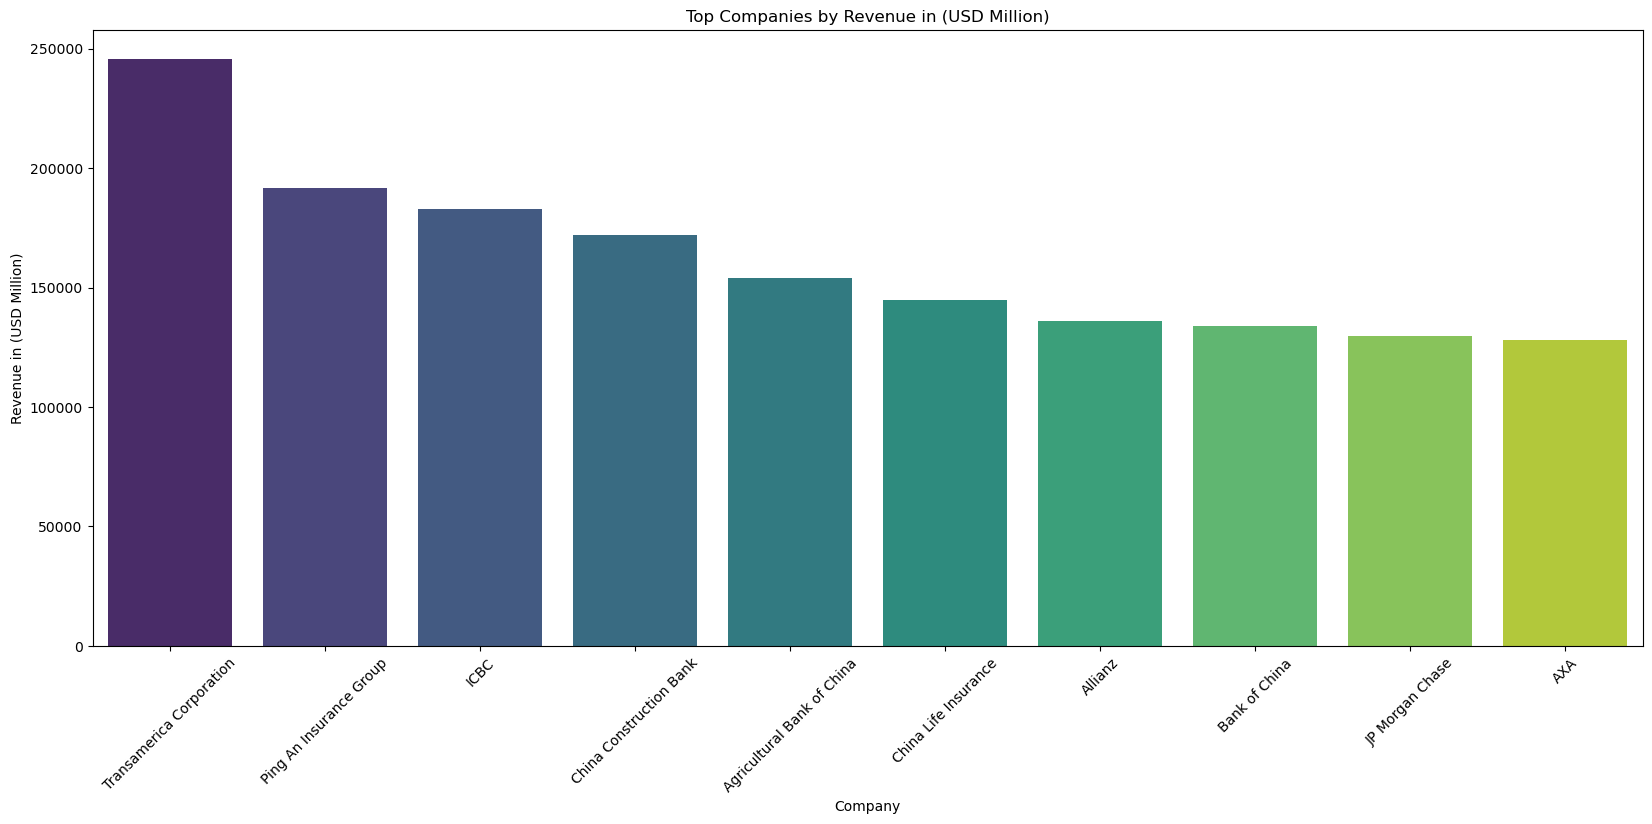

In [88]:
plt.figure(figsize=(20,8))
df_revenue = df.nlargest(10, 'Revenue in (USD Million)')
sns.barplot(data=df_revenue, x='Company', y='Revenue in (USD Million)', palette='viridis')
plt.title('Top Companies by Revenue in (USD Million)')
plt.xlabel('Company')
plt.ylabel('Revenue in (USD Million)')
plt.xticks(rotation=45)
plt.show()

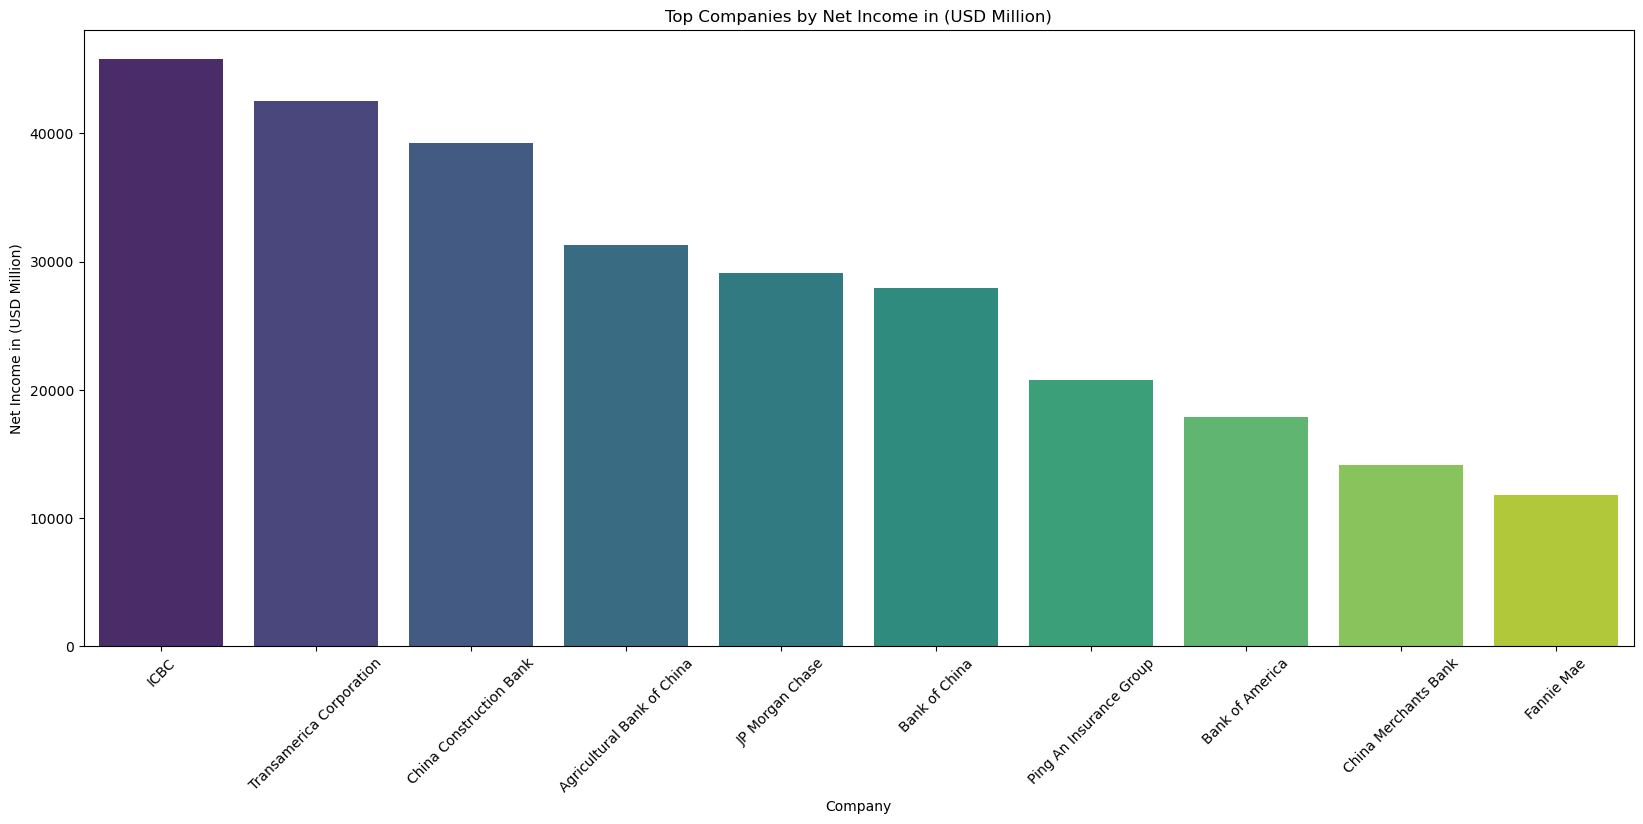

In [89]:
plt.figure(figsize=(20,8))
df_net_inc = df.nlargest(10, 'Net Income in (USD Millions)')
sns.barplot(data=df_net_inc, x='Company', y='Net Income in (USD Millions)', palette='viridis')
plt.title('Top Companies by Net Income in (USD Million)')
plt.xlabel('Company')
plt.ylabel('Net Income in (USD Million)')
plt.xticks(rotation=45)
plt.show()

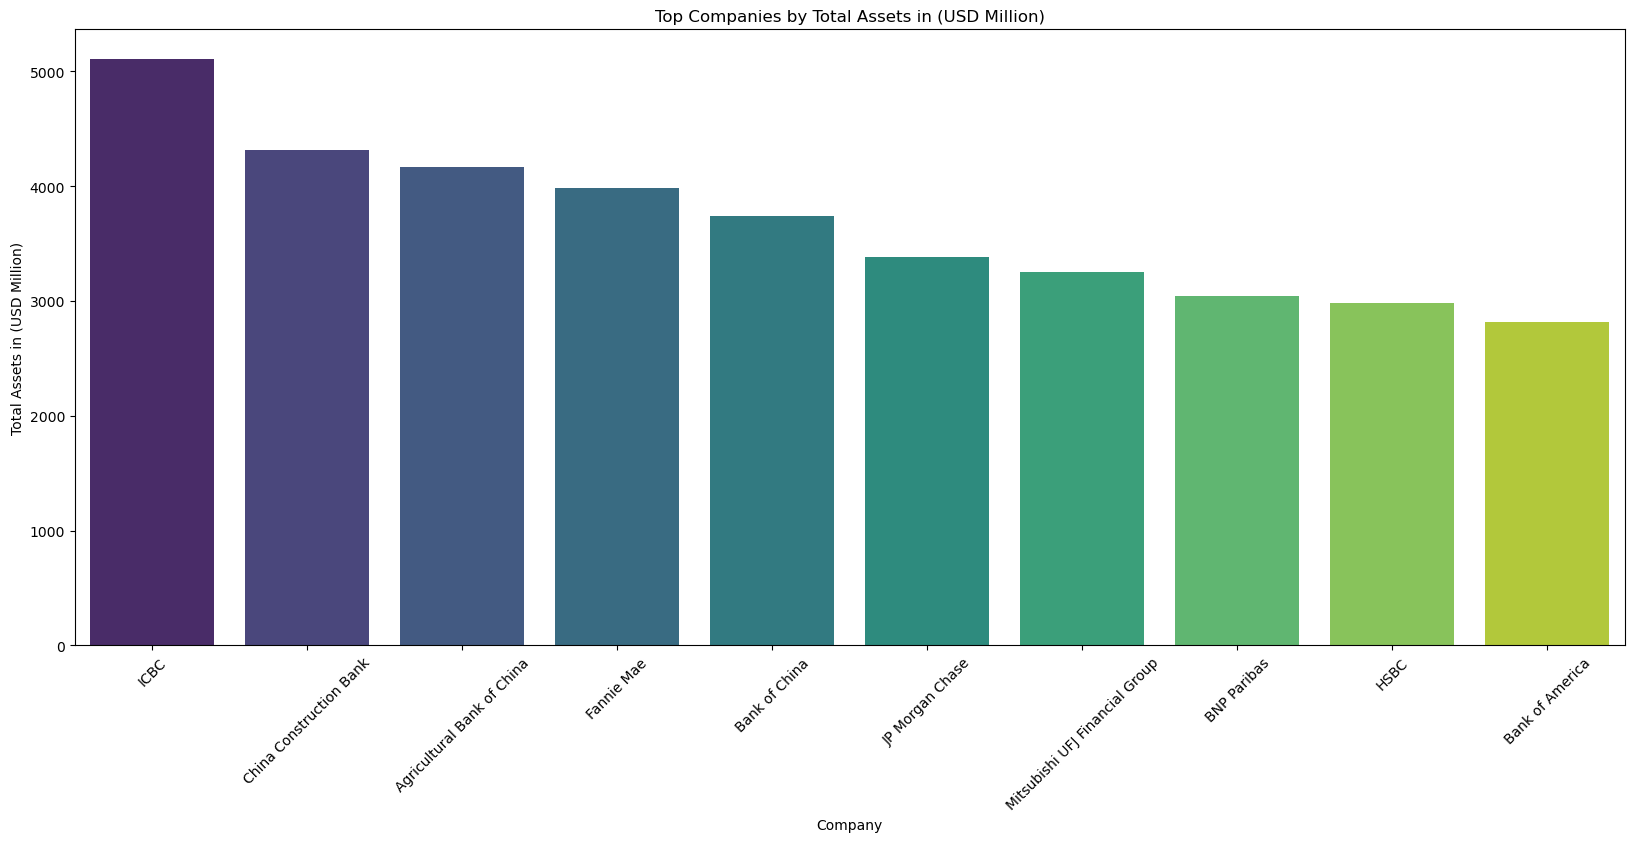

In [90]:
plt.figure(figsize=(20,8))
df_assets = df.nlargest(10, 'Total Assest in (USD Millions)')
sns.barplot(data=df_assets, x='Company', y='Total Assest in (USD Millions)', palette='viridis')
plt.title('Top Companies by Total Assets in (USD Million)')
plt.xlabel('Company')
plt.ylabel('Total Assets in (USD Million)')
plt.xticks(rotation=45)
plt.show()

Trying to find some relations in the data

In [91]:
px.scatter(data_frame=df, x='Revenue in (USD Million)', y='Net Income in (USD Millions)',size='Revenue in (USD Million)',trendline='ols',title='Relation Between Revenue and Net Income')

In [92]:
px.scatter(data_frame=df, x='Revenue in (USD Million)', y='Total Assest in (USD Millions)',size='Revenue in (USD Million)',trendline='ols',title='Relation Between Revenue and Total Assets')

In [93]:
px.scatter(data_frame=df, x='Net Income in (USD Millions)', y='Total Assest in (USD Millions)',size='Net Income in (USD Millions)',trendline='ols',title='Relation Between Net Income and Total Assets')